# Trader Behavior vs Market Sentiment Analysis

## Introduction
This project analyzes Bitcoin market sentiment using the Fear & Greed Index.
Due to the temporary unavailability of trader-level transaction data, this phase focuses on understanding sentiment trends and their implications on trading behavior.
The analysis framework is designed to integrate trader data once it becomes available.


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize'] = [10,5]

In [4]:
os.makedirs('/content/csv_files', exist_ok=True)
os.makedirs('/content/outputs', exist_ok=True)


# Load Dataset

In [6]:
df = pd.read_csv('/content/fear_greed_index.csv')
df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


## Dataset Overview
The Fear & Greed Index reflects overall market emotion, classified into Fear and Greed categories.


In [8]:
df.info()
df['classification'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


# Data Cleaning

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['classification'] = df['classification'].str.strip()

# Map sentiment to numeric for analysis
df['sentiment_numeric'] = df['classification'].map({
    'Fear': 0,
    'Greed': 1
})

df.head()


,timestamp,value,classification,date,sentiment_numeric
0,1517463000,30,Fear,2018-02-01,0.0
1,1517549400,15,Extreme Fear,2018-02-02,NaN
2,1517635800,40,Fear,2018-02-03,0.0
3,1517722200,24,Extreme Fear,2018-02-04,NaN
4,1517808600,11,Extreme Fear,2018-02-05,NaN


# Sentiment Distribution

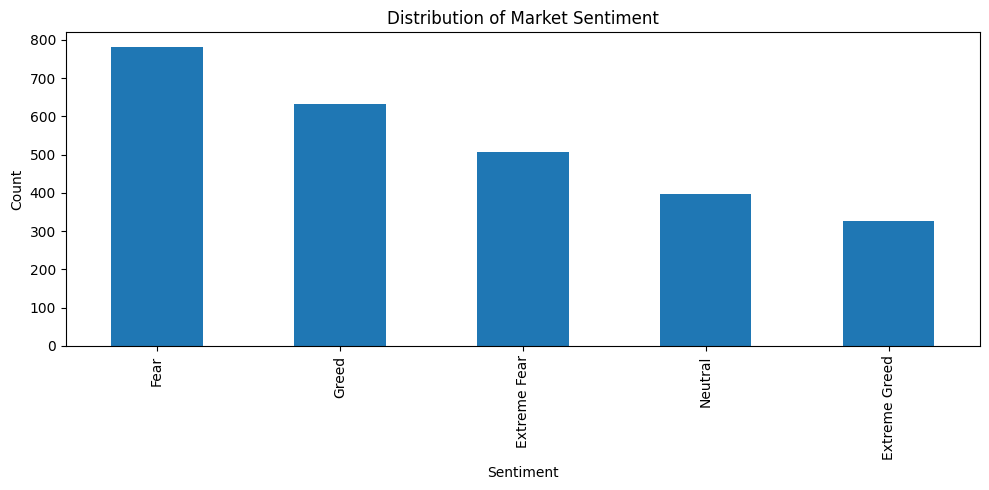

In [13]:
df['classification'].value_counts().plot(kind='bar')
plt.title('Distribution of Market Sentiment')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.savefig('/content/outputs/sentiment_distribution.png')
plt.show()


- Fear appears more frequently than Greed, indicating cautious market behavior.
- This suggests prolonged uncertainty in the crypto market.


# Sentiment Trend Over Time

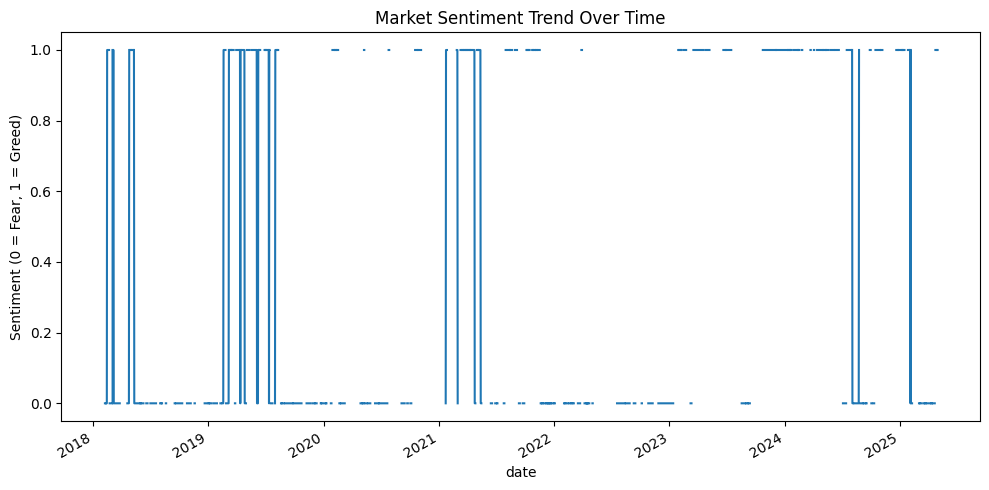

In [14]:
df.set_index('date')['sentiment_numeric'].plot()
plt.title('Market Sentiment Trend Over Time')
plt.ylabel('Sentiment (0 = Fear, 1 = Greed)')
plt.tight_layout()
plt.savefig('/content/outputs/sentiment_trend.png')
plt.show()


- Sentiment fluctuates frequently, indicating high emotional volatility.
- Rapid shifts may lead to impulsive trading decisions.


# Monthly Sentiment Pattern

/tmp/ipython-input-2595798578.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.set_index('date')['sentiment_numeric'].resample('M').mean()


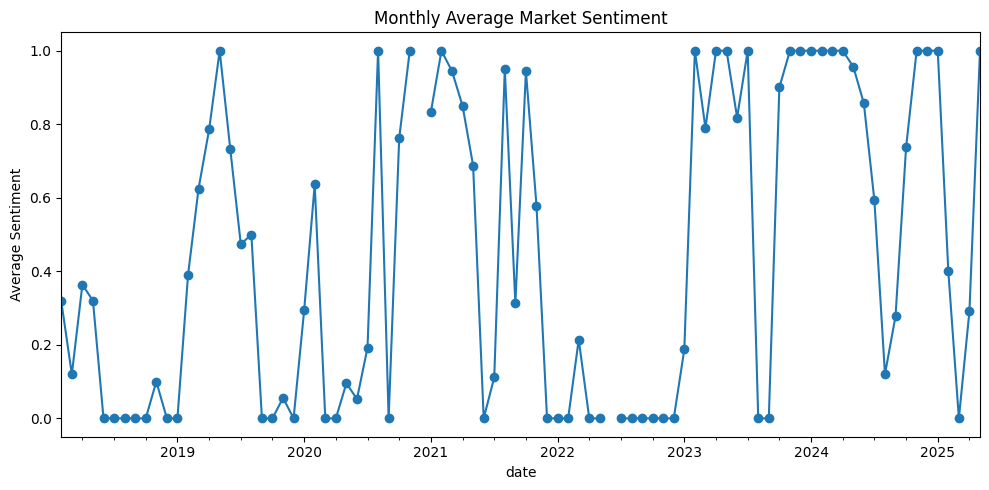

In [16]:
monthly_sentiment = df.set_index('date')['sentiment_numeric'].resample('M').mean()

monthly_sentiment.plot(marker='o')
plt.title('Monthly Average Market Sentiment')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.savefig('/content/outputs/monthly_sentiment.png')
plt.show()


- Certain months show prolonged Greed or Fear phases.
- These cycles can influence medium-term trading strategies.


In [17]:
df.to_csv('/content/csv_files/fear_greed_cleaned.csv', index=False)


#  Limitations
Trader-level transaction data was unavailable due to an inaccessible dataset link at the time of analysis.
As a result, direct correlations between sentiment and trading behavior could not be computed.


# Future Scope
- Integrate trader transaction data to analyze profitability, leverage, and volume across sentiment regimes.
- Quantify behavioral shifts during prolonged Fear and Greed periods.


## Conclusion
The Fear & Greed Index reveals strong emotional cycles in the crypto market.
Understanding these sentiment patterns provides a foundation for analyzing trader behavior once transaction-level data becomes available.


SyntaxError: invalid syntax (ipython-input-1028641671.py, line 2)